In [59]:
import pandas as pd
import pickle
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from soyclustering import SphericalKMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import euclidean
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [35]:
!pip install soyclustering

In [2]:
filepath = 'data/similarity_matrix.pickle'

In [3]:
with open(filepath, 'rb') as lf :
        similarity_vector = pickle.load(lf)

In [2]:
possibility_vector = pd.read_csv('data/possibility_vector.csv')

In [4]:
my_k = 40
my_k_hi = 2

In [49]:
similarity_matrix = pd.DataFrame(cosine_similarity(possibility_vector, possibility_vector))

Text(0, 0.5, 'Number of documents')

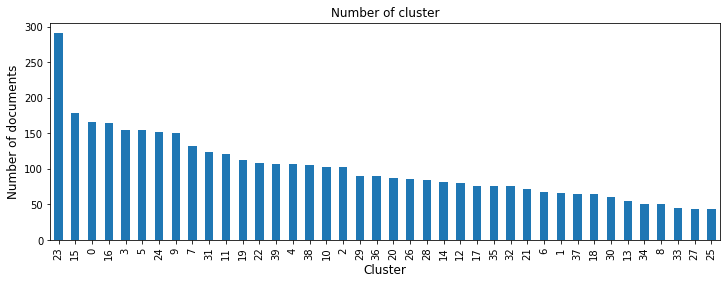

In [91]:
kmeans = KMeans(n_clusters= my_k, max_iter=100, random_state=100).fit(similarity_matrix)
clusters = kmeans.labels_

clusters = pd.DataFrame(clusters)
a = clusters[0].value_counts()

ax = a.plot(kind='bar', title='Number of cluster', figsize=(12, 4), legend=None)
ax.set_xlabel('Cluster', fontsize=12)
ax.set_ylabel('Number of documents', fontsize=12)

In [92]:
clusters

,0
0,6
1,11
2,7
3,7
4,39
...,...
4041,7
4042,7
4043,7
4044,13


In [106]:
clusters.columns = ['cluster']

In [108]:
raw_data = pd.read_csv('data/2016-2021.csv')

In [109]:
raw_data

,Unnamed: 0,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,Affiliations,Authors with affiliations,Abstract,Author Keywords,Index Keywords,Document Type,Publication Stage,Open Access,Source,EID
0,0,"Shin J.W., Oh J.H., Lee S.M., Lee S.E.",56645403600;57193057094;56333626100;55857982000;,CAN FD controller for in-vehicle system,2016,ISOCC 2016 - International SoC Design Conferen...,NaN,NaN,7799870,227,...,"Dept. of Electronic Engineering, Seoul Nationa...","Shin, J.W., Dept. of Electronic Engineering, S...","In this paper, we propose a Controller Area Ne...",CAN-FD; Embedded network; In-vehicle network,Control system synthesis; Control systems; Fin...,Conference Paper,Final,NaN,Scopus,2-s2.0-85010460391
1,1,"Kim J.K., Gwon O.S., Lee S.E.",57193067620;56646363300;55857982000;,Design of an area-efficient hardware filter fo...,2016,ISOCC 2016 - International SoC Design Conferen...,NaN,NaN,7799871,229,...,"Dept. of Electronic Engineering, Seoul Nationa...","Kim, J.K., Dept. of Electronic Engineering, Se...","In this paper, we propose an area-efficient ha...",Area-efficiency; Hardware filter; Quantization...,Bandpass filters; Embedded systems; Frequency ...,Conference Paper,Final,NaN,Scopus,2-s2.0-85010434955
2,2,"Kim H.S., Cha H.-K.",57193073064;14422204600;,A low-power capacitive-feedback CMOS neural re...,2016,ISOCC 2016 - International SoC Design Conferen...,NaN,NaN,7799786,279,...,Department of Electrical and Information Engin...,"Kim, H.S., Department of Electrical and Inform...",A low-power capacitive-feedback amplifier IC f...,Capacitive-feedback; Foldedcascode operational...,Amplifiers (electronic); CMOS integrated circu...,Conference Paper,Final,NaN,Scopus,2-s2.0-85010382711
3,3,"Kim H.S., Cha H.-K.",57193073064;14422204600;,"A low-power, low-noise neural recording amplif...",2016,ISOCC 2016 - International SoC Design Conferen...,NaN,NaN,7799784,275,...,Department of Electrical and Information Engin...,"Kim, H.S., Department of Electrical and Inform...",This paper presents a low power and low noise ...,Capacitive feedback; Neural amplifier; Neural ...,Bandwidth; Buffer amplifiers; Electrophysiolog...,Conference Paper,Final,NaN,Scopus,2-s2.0-85010379667
4,4,"Dai L., Kim C., Leibovich A.K.",57190073260;57226847451;6701753657;,Fragmentation of a jet with small radius,2016,Physical Review D,94,11,114023,NaN,...,Pittsburgh Particle Physics Astrophysics and C...,"Dai, L., Pittsburgh Particle Physics Astrophys...","In this paper, we consider the fragmentation o...",NaN,NaN,Article,Final,NaN,Scopus,2-s2.0-85012005931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,4041,"Kim M.H., Park S., Yoon J.M.",57203506363;55777146100;55377284200;,Industry portfolio allocation with asymmetric ...,2021,European Journal of Finance,27,1-2,NaN,178,...,Seoul National University of Science and Techn...,"Kim, M.H., Seoul National University of Scienc...",We develop a new framework of optimal consumpt...,dynamic and asymmetric correlation; Industry p...,NaN,Article,Final,NaN,Scopus,2-s2.0-85082405017
4042,4042,"Kim Y., Kang S.",55699655400;56814001800;,Effects of a weight control intervention based...,2021,Journal of Women and Aging,33,5,NaN,556,...,"Department of Sport Science, Seoul National Un...","Kim, Y., Department of Sport Science, Seoul Na...",The study examined the effect of a weight cont...,Middle-aged obese women; perceived benefits an...,NaN,Article,Final,NaN,Scopus,2-s2.0-85081733899
4043,4043,"Yang D., Kang Y.C., Park J.-W., Lee Y.I., Song...",57193099439;56608436100;34873006100;8866003700...,Power Smoothing of a Variable-speed Wind Turbi...,2021,"International Journal of Control, Automation a...",19,1,NaN,11,...,"School of Electrical Engineering, Nantong Univ...","Yang, D., School of Electrical Engineering, Na...",This paper presents a power-smoothing scheme o...,Control gain; energy-releasing capability; ene...,Maximum power point trackers; Turbogenerators;.

In [113]:
data = pd.merge(raw_data, clusters, left_index=True, right_index=True)

In [114]:
data.isnull().sum()

Unnamed: 0                      0
Authors                         0
Author(s) ID                    0
Title                           0
Year                            0
Source title                    2
Volume                        302
Issue                        1301
Art. No.                     2604
Page start                   1139
Page end                     1159
Page count                   4046
Cited by                     1321
DOI                           149
Link                            0
Affiliations                    0
Authors with affiliations       0
Abstract                        0
Author Keywords               522
Index Keywords               1057
Document Type                   0
Publication Stage               0
Open Access                  4046
Source                          0
EID                             0
cluster                         0
dtype: int64

In [115]:
data.to_csv('data/clustered_data.csv', index=False)

In [93]:
a

23    291
15    178
0     166
16    165
3     154
5     154
24    152
9     150
7     132
31    124
11    121
19    113
22    108
39    107
4     107
38    106
10    103
2     103
29     90
36     90
20     87
26     86
28     85
14     82
12     80
17     76
35     76
32     76
21     72
6      68
1      66
37     65
18     65
30     61
13     55
34     51
8      50
33     45
27     43
25     43
Name: 0, dtype: int64

In [9]:
lrg_cluster1 = a.index[0]
lrg_cluster2 = a.index[1]

In [10]:
clusters_large = clusters[clusters[0] == lrg_cluster1]

In [11]:
clusters_large.index

Int64Index([  53,   54,   98,  102,  110,  139,  158,  159,  162,  173,
            ...
            3738, 3806, 3818, 3819, 3904, 3916, 3917, 3947, 3988, 3995],
           dtype='int64', length=259)

In [12]:
lrg_cluster1_df = possibility_vector.loc[clusters_large.index, clusters_large.index]
lrg_cluster1_df

,53,54,98,102,110,139,158,159,162,173,...,3738,3806,3818,3819,3904,3916,3917,3947,3988,3995
53,1.000000,0.946433,0.887317,0.818401,0.873144,0.839538,0.628830,0.893546,0.703612,0.621376,...,0.743582,0.747538,0.853811,0.813759,0.714808,0.620257,0.626174,0.801390,0.768019,0.858744
54,0.946433,1.000000,0.837623,0.774818,0.826930,0.830883,0.578657,0.862111,0.680644,0.587497,...,0.676106,0.715283,0.832492,0.752892,0.771975,0.526337,0.544613,0.765674,0.713300,0.836421
98,0.887317,0.837623,1.000000,0.863314,0.895763,0.753947,0.734251,0.835990,0.836427,0.697810,...,0.791035,0.773292,0.814221,0.842120,0.646747,0.738469,0.765310,0.803158,0.810284,0.823987
102,0.818401,0.774818,0.863314,1.000000,0.841431,0.777475,0.926445,0.839496,0.807941,0.780255,...,0.815895,0.913404,0.846911,0.639044,0.657337,0.739459,0.731591,0.932869,0.905502,0.894671
110,0.873144,0.826930,0.895763,0.841431,1.000000,0.738842,0.717128,0.813229,0.825687,0.682949,...,0.707887,0.682726,0.765281,0.854664,0.655179,0.670358,0.657233,0.719193,0.712521,0.794073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3916,0.620257,0.526337,0.738469,0.739459,0.670358,0.560936,0.769470,0.676841,0.609601,0.675504,...,0.777408,0.785793,0.628317,0.754873,0.426022,1.000000,0.938077,0.782357,0.779038,0.722638
3917,0.626174,0.544613,0.765310,0.731591,0.657233,0.628280,0.749692,0.658989,0.651471,0.704946,...,0.806834,0.750814,0.622359,0.710808,0.429596,0.938077,1.000000,0.784410,0.788699,0.747209
3947,0.801390,0.765674,0.803158,0.932869,0.719193,0.788924,0.843458,0.861050,0.714846,0.768793,...,0.840016,0.916552,0.848485,0.603454,0.677909,0.782357,0.784410,1.000000,0.921056,0.909985
3988,0.768019,0.713300,0.810284,0.905502,0.712521,0.776841,0.883581,0.704021,0.585094,0.740102,...,0.818343,0.908798,0.704672,0.554972,0.588729,0.779038,0.788699,0.921056,1.000000,0.944818


In [13]:
clusters_large2 = clusters[clusters[0] == lrg_cluster2]

In [14]:
clusters_large2.index

Int64Index([   1,    7,   38,   49,   51,   57,   74,  104,  105,  115,
            ...
            3887, 3910, 3914, 3936, 3940, 3951, 3962, 3966, 3987, 3991],
           dtype='int64', length=256)

In [15]:
lrg_cluster2_df = possibility_vector.loc[clusters_large2.index, clusters_large2.index]
lrg_cluster2_df

,1,7,38,49,51,57,74,104,105,115,...,3887,3910,3914,3936,3940,3951,3962,3966,3987,3991
1,1.000000,0.870366,0.916566,0.904868,0.902489,0.908109,0.719578,0.935202,0.928470,0.897991,...,0.802558,0.887080,0.873283,0.823446,0.861235,0.809090,0.911161,0.912105,0.894440,0.790215
7,0.870366,1.000000,0.928573,0.913719,0.911306,0.919767,0.695038,0.901887,0.932672,0.875336,...,0.828379,0.872418,0.839141,0.750830,0.828237,0.841060,0.884349,0.889566,0.936421,0.808942
38,0.916566,0.928573,1.000000,0.972043,0.968957,0.946168,0.781496,0.926967,0.985753,0.960958,...,0.891614,0.910586,0.903054,0.903829,0.889526,0.856329,0.896173,0.906810,0.937525,0.899127
49,0.904868,0.913719,0.972043,1.000000,0.999320,0.944368,0.739995,0.888827,0.972477,0.918005,...,0.886670,0.893455,0.928997,0.859350,0.876222,0.873141,0.907658,0.927497,0.947008,0.893119
51,0.902489,0.911306,0.968957,0.999320,1.000000,0.941298,0.737727,0.886254,0.969600,0.914634,...,0.882974,0.890412,0.925554,0.855580,0.872902,0.869878,0.905059,0.924777,0.944359,0.889169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3951,0.809090,0.841060,0.856329,0.873141,0.869878,0.894053,0.659210,0.803840,0.851820,0.847829,...,0.937401,0.808075,0.862147,0.821825,0.837293,1.000000,0.805805,0.813676,0.825367,0.909068
3962,0.911161,0.884349,0.896173,0.907658,0.905059,0.881898,0.717686,0.840613,0.912183,0.832945,...,0.798667,0.803342,0.932185,0.777524,0.825799,0.805805,1.000000,0.939235,0.879992,0.839033
3966,0.912105,0.889566,0.906810,0.927497,0.924777,0.890515,0.783533,0.862288,0.921954,0.849465,...,0.828879,0.888837,0.928571,0.784368,0.871839,0.813676,0.939235,1.000000,0.902378,0.852553
3987,0.894440,0.936421,0.937525,0.947008,0.944359,0.962710,0.718309,0.865874,0.937832,0.873542,...,0.840063,0.870580,0.874354,0.798748,0.844976,0.825367,0.879992,0.902378,1.000000,0.826409


Text(0, 0.5, 'Number of documents')

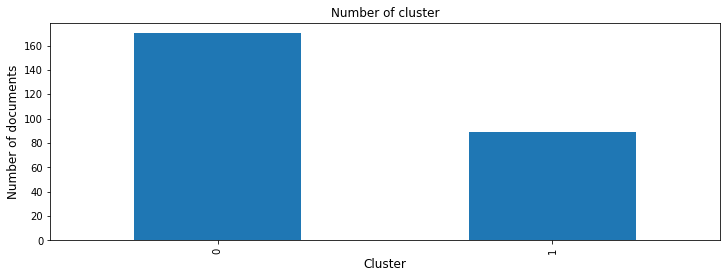

In [16]:
kmeans2 = KMeans(n_clusters= my_k_hi, random_state=1004).fit(lrg_cluster1_df)
clusters2 = kmeans2.labels_

clusters2 = pd.DataFrame(clusters2)
a2 = clusters2[0].value_counts()

ax2 = a2.plot(kind='bar', title='Number of cluster', figsize=(12, 4), legend=None)
ax2.set_xlabel('Cluster', fontsize=12)
ax2.set_ylabel('Number of documents', fontsize=12)

In [17]:
clusters2

,0
0,0
1,0
2,0
3,0
4,0
...,...
254,1
255,1
256,0
257,0


In [18]:
clusters2.index = clusters_large.index

Text(0, 0.5, 'Number of documents')

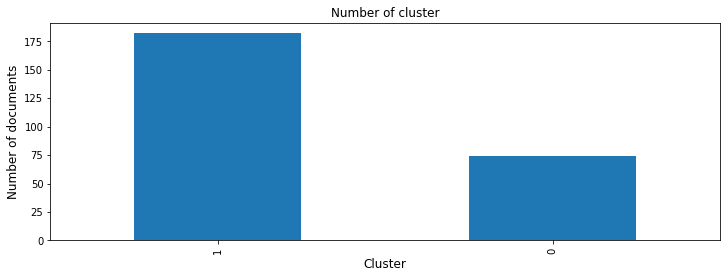

In [19]:
kmeans21 = KMeans(n_clusters= my_k_hi, random_state=1004).fit(lrg_cluster2_df)
clusters21 = kmeans21.labels_

clusters21 = pd.DataFrame(clusters21)
a21 = clusters21[0].value_counts()

ax21 = a21.plot(kind='bar', title='Number of cluster', figsize=(12, 4), legend=None)
ax21.set_xlabel('Cluster', fontsize=12)
ax21.set_ylabel('Number of documents', fontsize=12)

In [20]:
clusters21

,0
0,1
1,1
2,1
3,1
4,1
...,...
251,0
252,1
253,1
254,1


In [21]:
clusters21.index = clusters_large2.index

In [22]:
clusters21

,0
1,1
7,1
38,1
49,1
51,1
...,...
3951,0
3962,1
3966,1
3987,1


In [23]:
clusters.columns = ['org_cluster'] # this is the number of original cluster
clusters2.columns = ['lrg1_cluster'] # this is the number of small cluster in the largest cluster
clusters21.columns = ['lrg2_cluster'] # this is the number of small cluster in the 2nd largest cluster

 == New init == 
iteration: 0
1939.8703388227627
iteration: 1
3067.454073861669
iteration: 2
3263.8306906480484
iteration: 3
3332.3152506125607
iteration: 4
3357.3882808526505
iteration: 5
3368.090949319284
iteration: 6
3377.820994734362
iteration: 7
3385.427558329538
iteration: 8
3389.312720359714
iteration: 9
3391.2513857000285
iteration: 10
3393.214621609778
iteration: 11
3395.8935856864173
iteration: 12
3398.629970872994
iteration: 13
3402.7870972123424
iteration: 14
3407.3054554183964
iteration: 15
3408.873312435586
iteration: 16
3409.2449594351356
iteration: 17
3409.4483806020467
iteration: 18
3409.50882620038
iteration: 19
3409.5741531277686


Text(0, 0.5, 'Number of documents')

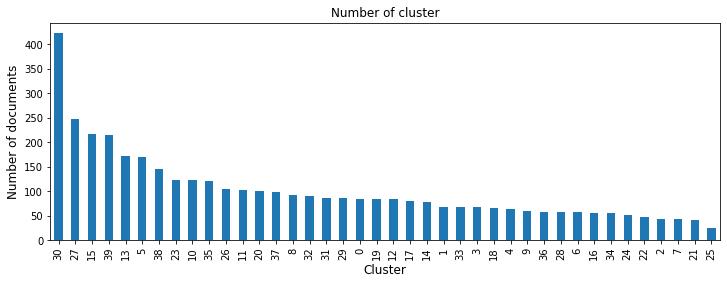

In [88]:
possibility_vector2 = possibility_vector.to_numpy()

kmeans3 = SphericalKmeans(n_clusters= my_k, random_state=1001)
s_kmeans = kmeans3.fit(possibility_vector2)
clusters3 = kmeans3.labels_

clusters3 = pd.DataFrame(clusters3)
a3 = clusters3[0].value_counts()

ax3 = a3.plot(kind='bar', title='Number of cluster', figsize=(12, 4), legend=None)
ax3.set_xlabel('Cluster', fontsize=12)
ax3.set_ylabel('Number of documents', fontsize=12)

In [33]:
a3

36    457
8     222
35    208
10    183
39    169
20    169
33    137
0     131
22    128
32    122
3     118
34    114
17    100
16     98
30     93
19     92
2      91
25     87
27     86
23     84
28     79
21     77
37     76
24     75
13     75
4      74
11     70
1      70
29     70
7      66
14     64
9      60
26     59
38     51
15     44
12     42
6      37
18     36
31     32
Name: 0, dtype: int64

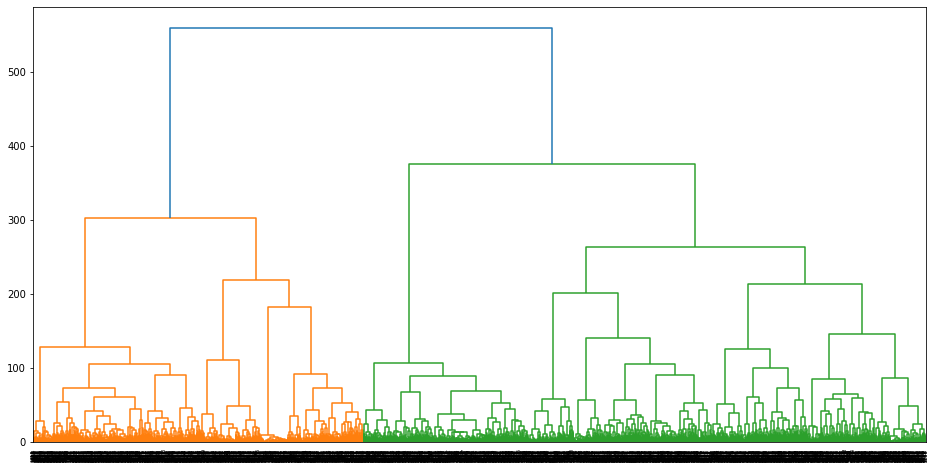

In [25]:
linked = linkage(possibility_vector, method = 'ward')

plt.figure(figsize=(16, 8))
dendrogram(linked)
plt.show()